# Inventory Management Project

### Project Objective: - Minimize inventory related operational costs and lost sales opportunities by accurately predicting whether a product is at a risk of 'Stockout' or 'Overstock'

## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [ ]:
df = pd.read_excel('stock_risk_prediction_dataset (1).xlsx')
df

,current_stock,avg_daily_demand,lead_time_days,reorder_point,sales_last_30_days,stock_turnover_ratio,forecast_error,season,item_category,supplier_reliability,stock_status
0,549,45.76,5.64,342.83,1604.49,4.17,-9.90,peak,essential,low,overstock
1,486,45.47,6.39,348.37,1585.00,4.01,-5.27,peak,non-essential,high,overstock
2,564,32.04,5.81,353.21,1219.04,3.57,-2.94,off-peak,non-essential,high,overstock
3,652,46.70,7.22,397.34,1673.88,4.00,0.75,off-peak,essential,low,overstock
4,476,57.33,9.39,312.64,1052.98,4.49,5.12,peak,essential,high,overstock
...,...,...,...,...,...,...,...,...,...,...,...
4995,495,63.01,5.18,369.39,1318.30,3.42,6.43,off-peak,essential,high,overstock
4996,571,30.02,9.47,418.87,1413.75,5.44,-4.25,peak,essential,high,overstock
4997,811,42.95,9.62,368.92,1790.33,3.50,-4.11,off-peak,essential,low,overstock
4998,580,54.96,5.23,435.68,1687.11,2.11,-6.62,off-peak,essential,low,overstock


### Understanding the features:

#### 1. current_stock: Current stock available in inventory (units)

#### 2. avg_daily_demand:	Average daily demand of the item (units/day)

#### 3. lead_time_days:	Number of days it takes to receive stock after ordering

#### 4. reorder_point:	Threshold level at which new stock should be ordered (units)

#### 5. sales_last_30_days:	Total quantity of the item sold in the past 30 days

#### 6. stock_turnover_ratio:	How often the inventory is turned over (sales/inventory)

#### 7. forecast_error:	Deviation between predicted and actual demand (units)

#### 8. season:	peak, off-peak	(Seasonal classification)

#### 9. item_category:	essential, non-essential	(Business-critical or not)

#### 10. supplier_reliability:	high, low	(Supplier's delivery reliability)

#### 11. stock_status: stockout, overstock - Binary label indicating inventory risk type (Target Column)

## Exploratory Data Analysis (EDA)

In [ ]:
# Checking number of rows and columns in the dataset
df.shape

(5000, 11)

In [ ]:
# Checking if any null records are present in the dataset
df.isna().sum()

,0
current_stock,0
avg_daily_demand,0
lead_time_days,0
reorder_point,0
sales_last_30_days,0
stock_turnover_ratio,0
forecast_error,0
season,0
item_category,0
supplier_reliability,0


In [ ]:
# There are no missing records in the dataset.

In [ ]:
# Checking if the dataset contains any duplicate records
df.duplicated().sum()

np.int64(0)

In [ ]:
# There are no duplicate records in the dataset.

In [ ]:
# Checking datatypes of all the features
df.dtypes

,0
current_stock,int64
avg_daily_demand,float64
lead_time_days,float64
reorder_point,float64
sales_last_30_days,float64
stock_turnover_ratio,float64
forecast_error,float64
season,object
item_category,object
supplier_reliability,object


In [ ]:
# From above, we can see the dataset consists of 7 numerical features and 4 categorical features.

In [ ]:
# Identify min-max range, mean & median of numerical features
df.describe()

,current_stock,avg_daily_demand,lead_time_days,reorder_point,sales_last_30_days,stock_turnover_ratio,forecast_error
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,500.065800,49.901224,7.021084,350.825734,1494.494344,3.993402,-0.054578
std,99.647785,10.104358,1.997617,50.166808,295.012442,0.999404,5.129634
min,175.000000,10.780000,0.250000,157.180000,403.470000,0.550000,-22.330000
25%,434.000000,43.130000,5.680000,316.765000,1289.470000,3.300000,-3.540000
50%,501.000000,49.825000,7.020000,350.960000,1497.595000,4.000000,-0.120000
75%,566.000000,56.772500,8.350000,385.332500,1695.180000,4.680000,3.442500
max,892.000000,85.290000,13.860000,573.950000,2583.410000,7.690000,18.640000


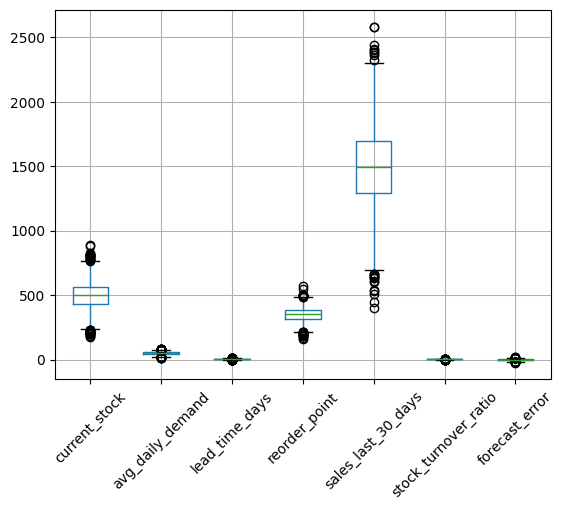

In [ ]:
# Checking outliers
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# From above plot we can tell there are significant amount of outliers in the numerical features.

In [ ]:
# Define numerical features
numerical_features = ['current_stock', 'avg_daily_demand', 'lead_time_days', 'reorder_point', 'sales_last_30_days', 'stock_turnover_ratio', 'forecast_error']

# Calculate IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()

print(num_outliers)

237


In [ ]:
# We can see there are significant number of outliers present in the dataset. Removing the outliers may not give us the actual
# picture and it is better to impute the data to preserve the original size of the dataset as the outliers might contain
# some valuable information.

In [ ]:
# Treating outliers using IQR

for feature in numerical_features:
  df[feature] = np.where(df[feature] < lower_bound[feature], lower_bound[feature], df[feature])
  df[feature] = np.where(df[feature] > upper_bound[feature], upper_bound[feature], df[feature])

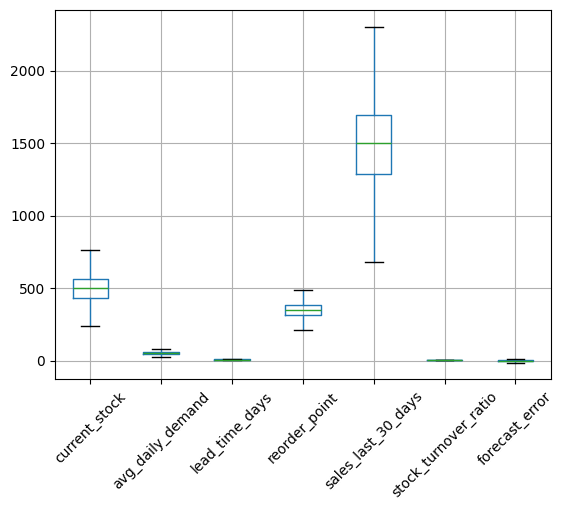

In [ ]:
# Verifying if all the outliers are treated
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# All the outliers in the dataset are now imputed.

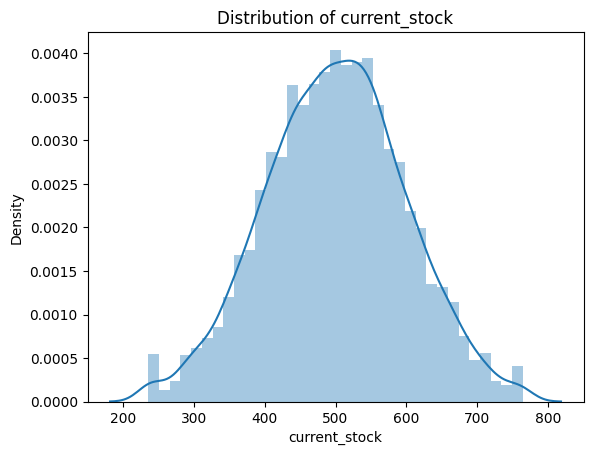

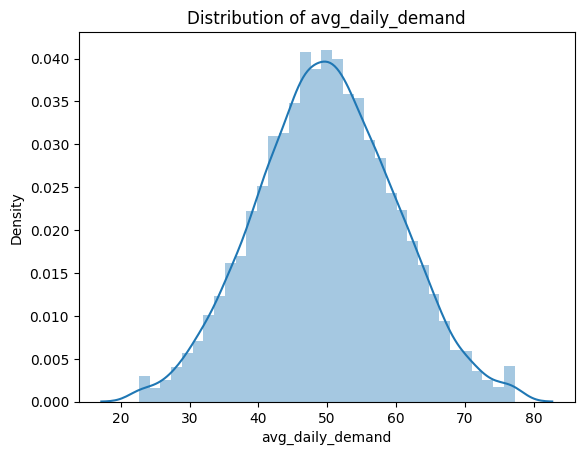

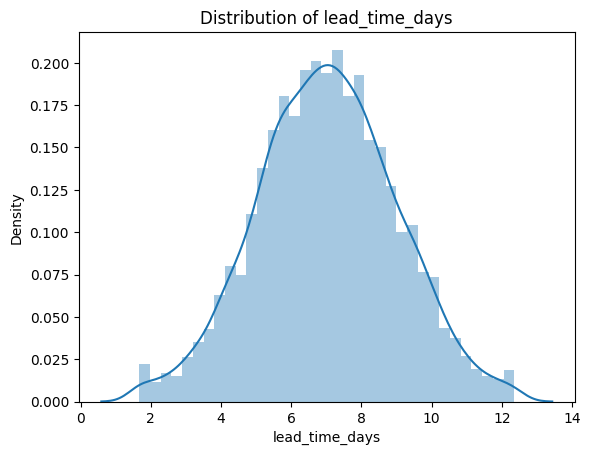

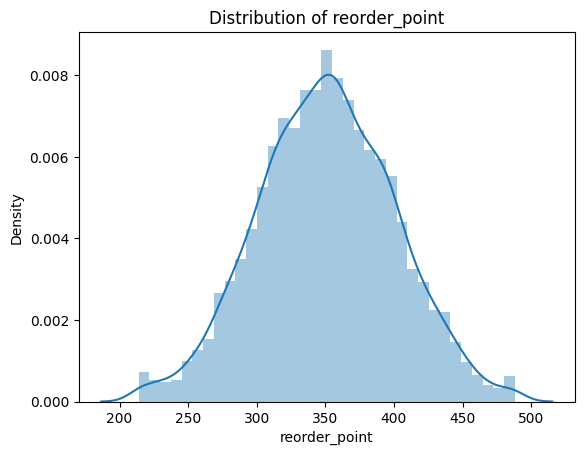

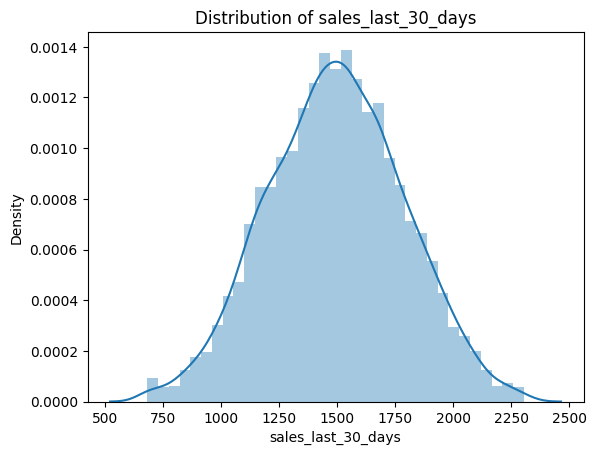

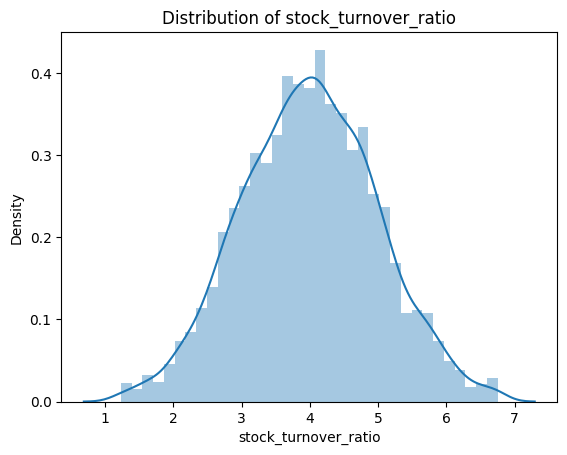

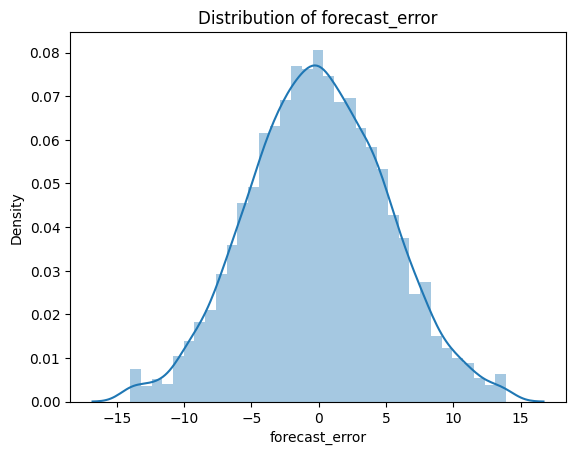

In [ ]:
# Check distribution of all numerical features

for feature in numerical_features:
  sns.distplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

In [ ]:
# All the numerical features have a distribution very close to normal distribution. It suggests that we can proceed with our
# standard statistical and machine learning techniques without major concerns about distributional assumptions.

season
off-peak    2508
peak        2492
Name: count, dtype: int64


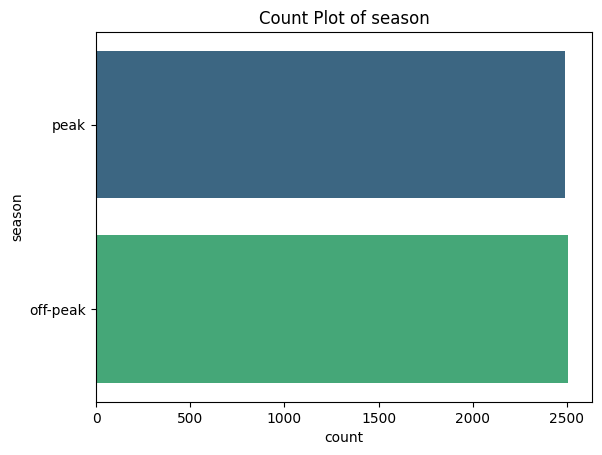

item_category
essential        2505
non-essential    2495
Name: count, dtype: int64


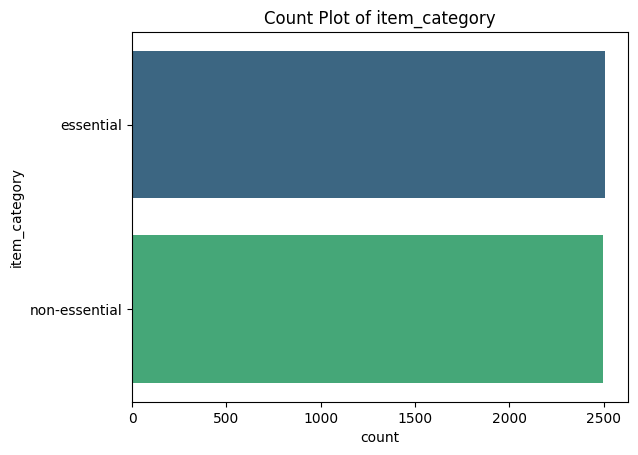

supplier_reliability
low     2514
high    2486
Name: count, dtype: int64


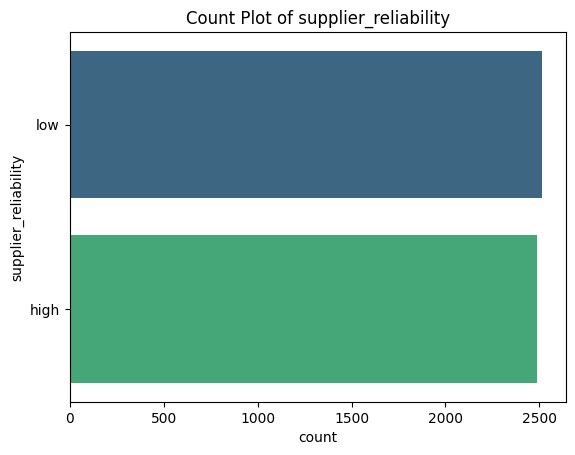

stock_status
overstock    4543
stockout      457
Name: count, dtype: int64


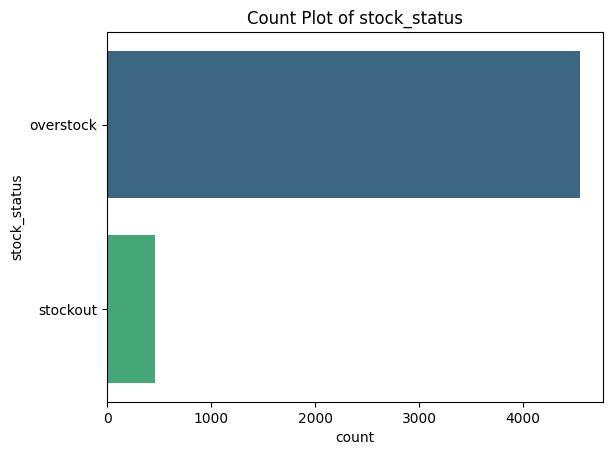

In [ ]:
# Let's check unique values for each categorical column

# Define categorical features
categorical_features = ['season', 'item_category', 'supplier_reliability', 'stock_status']

for feature in categorical_features:
  sns.countplot(df[feature], palette='viridis')
  plt.title(f'Count Plot of {feature}')
  print(df[feature].value_counts())
  plt.show()

In [ ]:
# From above countplots of categorical features, it is clear that the features 'season', 'item_category' & 'supplier_reliability'
# have fairly equal counts of its binary categories.

# Whereas, the countplot for 'stock_status' feature depicts an imbalanced distribution of counts for its binary categories
# where the count of items in the 'overstock' category is very high compared to the other category 'stockout'. This implies
# that the dataset is imbalanced.

# When training machine learning models on imbalanced datasets, models tend to become biased towards the majority class.
# This means the model might perform well at predicting "overstock" but poorly at predicting "stockout," which could be
# the more critical category to identify for inventory management.

## Data Preprocessing

In [ ]:
# Install and import necessary libraries

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Split the data into X(features) and y(target)
X = df.drop('stock_status', axis=1)
y = df['stock_status']

In [ ]:
# Define categorical features excluding target variable
categorical_features = ['season', 'item_category', 'supplier_reliability']

In [ ]:
# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_features)
X

,current_stock,avg_daily_demand,lead_time_days,reorder_point,sales_last_30_days,stock_turnover_ratio,forecast_error,season_off-peak,season_peak,item_category_essential,item_category_non-essential,supplier_reliability_high,supplier_reliability_low
0,549.0,45.76,5.64,342.83,1604.49,4.17,-9.90,False,True,True,False,False,True
1,486.0,45.47,6.39,348.37,1585.00,4.01,-5.27,False,True,False,True,True,False
2,564.0,32.04,5.81,353.21,1219.04,3.57,-2.94,True,False,False,True,True,False
3,652.0,46.70,7.22,397.34,1673.88,4.00,0.75,True,False,True,False,False,True
4,476.0,57.33,9.39,312.64,1052.98,4.49,5.12,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,495.0,63.01,5.18,369.39,1318.30,3.42,6.43,True,False,True,False,True,False
4996,571.0,30.02,9.47,418.87,1413.75,5.44,-4.25,False,True,True,False,True,False
4997,764.0,42.95,9.62,368.92,1790.33,3.50,-4.11,True,False,True,False,False,True
4998,580.0,54.96,5.23,435.68,1687.11,2.11,-6.62,True,False,True,False,False,True


In [ ]:
# Apply SMOTE technique
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled

,current_stock,avg_daily_demand,lead_time_days,reorder_point,sales_last_30_days,stock_turnover_ratio,forecast_error,season_off-peak,season_peak,item_category_essential,item_category_non-essential,supplier_reliability_high,supplier_reliability_low
0,549.000000,45.760000,5.640000,342.830000,1604.490000,4.170000,-9.900000,False,True,True,False,False,True
1,486.000000,45.470000,6.390000,348.370000,1585.000000,4.010000,-5.270000,False,True,False,True,True,False
2,564.000000,32.040000,5.810000,353.210000,1219.040000,3.570000,-2.940000,True,False,False,True,True,False
3,652.000000,46.700000,7.220000,397.340000,1673.880000,4.000000,0.750000,True,False,True,False,False,True
4,476.000000,57.330000,9.390000,312.640000,1052.980000,4.490000,5.120000,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,466.590217,45.717790,7.012167,480.504755,1625.290884,4.256039,-0.693335,True,True,False,True,True,True
9082,375.890297,46.251222,7.210970,406.898835,1814.644523,4.134839,-5.425553,False,True,True,False,True,True
9083,397.621092,36.745309,9.732920,430.958985,1806.795548,4.063476,-0.681102,False,True,True,False,True,True
9084,400.439038,46.086331,8.055609,422.209043,987.425353,4.185365,3.535850,True,True,False,True,True,False


In [ ]:
y_resampled

,stock_status
0,overstock
1,overstock
2,overstock
3,overstock
4,overstock
...,...
9081,stockout
9082,stockout
9083,stockout
9084,stockout


In [ ]:
# Check the class distribution after resampling
print(Counter(y_resampled))

Counter({'overstock': 4543, 'stockout': 4543})


In [ ]:
# Concatenate resampled features and target in a single dataframe
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
resampled_df

,current_stock,avg_daily_demand,lead_time_days,reorder_point,sales_last_30_days,stock_turnover_ratio,forecast_error,season_off-peak,season_peak,item_category_essential,item_category_non-essential,supplier_reliability_high,supplier_reliability_low,stock_status
0,549.000000,45.760000,5.640000,342.830000,1604.490000,4.170000,-9.900000,False,True,True,False,False,True,overstock
1,486.000000,45.470000,6.390000,348.370000,1585.000000,4.010000,-5.270000,False,True,False,True,True,False,overstock
2,564.000000,32.040000,5.810000,353.210000,1219.040000,3.570000,-2.940000,True,False,False,True,True,False,overstock
3,652.000000,46.700000,7.220000,397.340000,1673.880000,4.000000,0.750000,True,False,True,False,False,True,overstock
4,476.000000,57.330000,9.390000,312.640000,1052.980000,4.490000,5.120000,False,True,True,False,True,False,overstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,466.590217,45.717790,7.012167,480.504755,1625.290884,4.256039,-0.693335,True,True,False,True,True,True,stockout
9082,375.890297,46.251222,7.210970,406.898835,1814.644523,4.134839,-5.425553,False,True,True,False,True,True,stockout
9083,397.621092,36.745309,9.732920,430.958985,1806.795548,4.063476,-0.681102,False,True,True,False,True,True,stockout
9084,400.439038,46.086331,8.055609,422.209043,987.425353,4.185365,3.535850,True,True,False,True,True,False,stockout


In [ ]:
# Looking at the increased number of features after applying one-hot encoding and SMOTE, we need to apply PCA technique
# to reduce dimensionality. The SMOTE technique has ensured that the minority class is now well-represented which can
# help PCA identify components that are relevant to both classes.

## Dimensionality Reduction

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X = resampled_df.drop('stock_status', axis=1)
y = resampled_df['stock_status']

In [ ]:
# Scaling the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Initialize PCA to keep 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.61087877, -0.48965922, -2.66800716, ..., -1.7348196 ,
        -0.14225083,  0.14116693],
       [-0.94613263,  1.96874171,  0.63099733, ..., -1.08668872,
        -0.10900988, -0.13976989],
       [ 0.30602392, -0.14445478,  2.37199247, ..., -1.26238596,
         0.14410669,  0.19590375],
       ...,
       [ 0.343984  ,  1.1223512 , -1.68599368, ..., -1.26648016,
         0.58874781, -0.09936181],
       [-0.23043285,  1.24266007,  1.89797451, ...,  0.79480886,
         0.58585178, -0.0059839 ],
       [-1.37628887,  0.21588313, -1.22050707, ...,  0.14266953,
         1.02535232, -0.15653159]])

In [ ]:
# Check explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.13363753, 0.12425375, 0.12082158, 0.11380974, 0.08184751,
       0.07901653, 0.07812984, 0.073663  , 0.0717218 , 0.06245255,
       0.02353353])

In [ ]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_explained_variance_ratio

array([0.13363753, 0.25789128, 0.37871287, 0.49252261, 0.57437012,
       0.65338665, 0.73151649, 0.80517949, 0.87690128, 0.93935383,
       0.96288737])

In [ ]:
pca_df = pd.DataFrame(X_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.610879,-0.489659,-2.668007,0.646322,0.677759,-0.815919,-1.059675,-0.079681,-1.734820,-0.142251,0.141167
1,-0.946133,1.968742,0.630997,1.238286,0.435397,-0.425610,-0.574454,-0.129490,-1.086689,-0.109010,-0.139770
2,0.306024,-0.144455,2.371992,1.509478,-0.181549,0.924957,-1.708165,0.382511,-1.262386,0.144107,0.195904
3,0.805065,-2.437253,-1.046685,0.828012,-0.229356,0.470142,0.540420,0.272060,-0.858743,1.295060,0.350949
4,1.033425,1.578360,-1.304587,1.239975,0.274417,0.246142,0.049203,1.705399,1.982153,-0.491473,0.018281
...,...,...,...,...,...,...,...,...,...,...,...
9081,-0.933264,0.400347,1.190694,-1.365235,-0.009111,0.337738,0.589336,0.140225,-1.088178,1.540595,0.716014
9082,0.352033,1.000869,-1.791029,-0.893398,-0.281348,-0.841713,0.111206,-0.094225,-1.342778,0.184771,-0.130708
9083,0.343984,1.122351,-1.685994,-0.874534,-1.697346,-0.119709,0.696271,0.999373,-1.266480,0.588748,-0.099362
9084,-0.230433,1.242660,1.897975,-0.540670,0.000907,0.953682,-0.467890,1.374304,0.794809,0.585852,-0.005984


In [ ]:
# There are 11 principal components identified that explains 96.28% of the variance in the data.

In [ ]:
# Target variable
y

,stock_status
0,overstock
1,overstock
2,overstock
3,overstock
4,overstock
...,...
9081,stockout
9082,stockout
9083,stockout
9084,stockout


In [ ]:
# Let's convert target variable into numerical binary classification
y = y.map({'stockout' : 0, 'overstock' : 1})
y

,stock_status
0,1
1,1
2,1
3,1
4,1
...,...
9081,0
9082,0
9083,0
9084,0


## Model Building

In [ ]:
# Import necessary libraries for classification models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=True)

In [ ]:
# Define a list of classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier()
}

In [ ]:
# Train and evaluate each model

results = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)


  results[model_name] = {
      "Accuracy": accuracy
  }
  print(f"{model_name} - Accuracy: {accuracy}")

Logistic Regression - Accuracy: 0.9983498349834984
Decision Tree - Accuracy: 0.9900990099009901
Random Forest - Accuracy: 0.9988998899889989
Support Vector Machine - Accuracy: 0.995049504950495
XGBoost - Accuracy: 0.9972497249724972


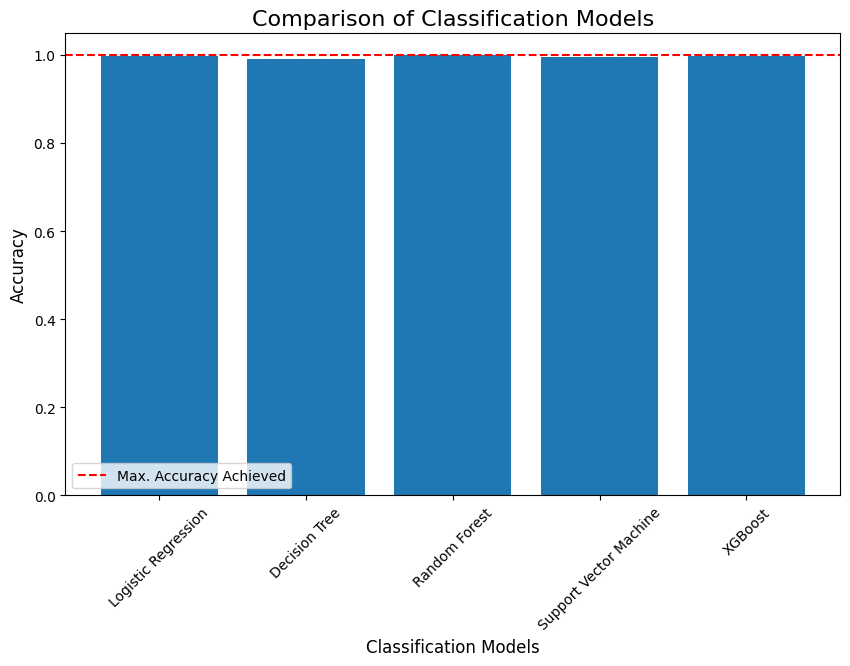

In [ ]:
# Plot accuracies of all the classification models
models = results.keys()
accuracies = [results[model]['Accuracy'] for model in models]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.xlabel('Classification Models', size=12)
plt.ylabel('Accuracy', size=12)
plt.title('Comparison of Classification Models', size=16)
plt.xticks(rotation=45)
plt.axhline(y=0.9988, linestyle='--', color='red', label='Max. Accuracy Achieved')
plt.legend()
plt.show()

## INFERENCE:

### We are getting very high accuracy scores for all the classification models after applying SMOTE for following reasons:

#### 1. SMOTE (Synthetic Minority Over-sampling Technique) is designed to address class imbalance by creating synthetic samples of the minority class. By doing this, it balances the dataset and helps models learn the characteristics of the minority class better.

#### 2. We have also applied PCA (Principal Component Analysis), which reduces the dimensionality of the data while retaining most of the variance. This has helped in improving model's performance by removing noise and highlighting the most important features.

#### 3. While high accuracy on the test set is generally good, with synthetic data generated by SMOTE, there's always a slight possibility of the model overfitting to the patterns in the synthetic data. However, given the high scores across multiple different types of models (Logistic Regression, Tree-based, SVM, XGBoost), it suggests that the models are genuinely performing well on the resampled data.

## CONCLUSION:

### The high accuracy scores for all the classification models are a direct result of addressing the class imbalance using SMOTE, allowing the models to learn effectively from both classes. The combination with PCA likely also contributed to a cleaner dataset for the models to train on. For deployment purpose, even though all the classification models have given very high accuracy rates, we will use Random Forest Classifier as among all the classifiers it has given the highest accuracy.